In [1]:
import os
import json
import csv
import pandas as pd
from collections import OrderedDict
import numpy as np
import sys
sys.path.append('..')

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid': False})

np.random.seed(1337)

In [2]:
%matplotlib inline

In [3]:
output_dir = '/scratch/jtc440/sonyc-kalman/output'

In [4]:
data_dir = "/scratch/jtc440/sonyc-kalman"                                                         
data_path = os.path.join(data_dir, 'sonycnode-b827eb2a1bce_60minslot_medoid.npz')                 
train_mask_path = os.path.join(data_dir, 'sonycnode-b827eb2a1bce_60minslot_medoid_train_mask.npy')
test_mask_path = os.path.join(data_dir, 'sonycnode-b827eb2a1bce_60minslot_medoid_test_mask.npy')  
output_dir = os.path.join(data_dir, "output")                                                     

In [5]:
with open('/home/jtc440/dev/sonyc-kalman/sonyc_kalman/script_gen/hashes_to_params.json', 'r') as f:
    hashes_to_params = json.load(f)

In [6]:
base_params = next(iter(hashes_to_params.values()))
search_params = set()

for params in hashes_to_params.values():
    for k, v in params.items():
        if base_params[k] != v:
            search_params.add(k)
            
search_params = sorted(list(search_params))

In [7]:
total_results_df = []

In [8]:
for exp_hash in os.listdir(output_dir):
    exp_dir = os.path.join(output_dir, exp_hash)
    timestamp = sorted(os.listdir(exp_dir))[-1]
    exp_dir = os.path.join(exp_dir, timestamp)
    
    results_path = os.path.join(exp_dir, 'results.csv')
    imputation_results_path = os.path.join(exp_dir, 'imputation_results.json')
    if not os.path.exists(results_path):
        continue
        
    results = pd.read_csv(results_path)
    if len(results) == 0:
        continue
        
    final_results = dict(results.iloc[-1])
    params = hashes_to_params[exp_hash]
        
    if final_results['epoch'] < 299:
        continue
        
    if not os.path.exists(imputation_results_path):
        continue
        
    try:
        with open(imputation_results_path, 'r') as f:
            imp_results = json.load(f)
    except json.JSONDecodeError:
        continue

    row = OrderedDict()
    row.update(final_results)
    row.update(params)
    row.update(imp_results)
    row['model_dir'] = exp_dir
    total_results_df.append(row)
    
total_results_df = pd.DataFrame(total_results_df)

In [9]:
total_results_df

,epoch,train_elbo_tot,train_elbo_kf,train_elbo_vae,train_log_px,train_log_qa,test_elbo_tot,test_elbo_kf,test_elbo_vae,test_log_px,...,noise_emission,noise_transition,init_cov,noise_var,ll_keep_prob,generate_step,eval_norm_mse_a_imputed,eval_mse_unobs_smooth,eval_mse_unobs_filt,model_dir
0,299.0,-19.536953,21.671375,-86.771700,-65.090520,21.681171,-68.799990,21.632591,-90.432570,-68.786570,...,0.03,0.08,20.0,0.1,1.0,5,1.000004,56.046535,185.957489,/scratch/jtc440/sonyc-kalman/output/c3de99f86a...
1,299.0,-1.406226,41.897537,-44.696000,-1.546931,43.149067,-7.047291,41.286396,-48.333687,-5.295323,...,0.03,0.08,20.0,0.1,1.0,5,0.991470,48.928864,47.684586,/scratch/jtc440/sonyc-kalman/output/6ab5341f0b...
2,299.0,-2.112988,41.011032,-45.074360,-2.167040,42.907314,-11.059463,38.798824,-49.858288,-7.014790,...,0.03,0.08,20.0,0.1,1.0,5,0.989146,161.426453,61.737198,/scratch/jtc440/sonyc-kalman/output/3c7845695f...
3,299.0,-1.563772,41.971740,-46.129333,-2.882018,43.247320,-8.185135,41.673496,-49.858630,-6.699005,...,0.03,0.08,20.0,0.1,1.0,5,0.998209,43.238815,217.603119,/scratch/jtc440/sonyc-kalman/output/59108a2189...
4,299.0,-1.468830,20.188128,-23.159600,-1.669605,21.489998,-7.811580,20.048992,-27.860573,-6.223851,...,0.03,0.08,20.0,0.1,1.0,5,0.997136,213.265244,58.246040,/scratch/jtc440/sonyc-kalman/output/99e34951ae...
5,299.0,2.145312,40.330055,-26.179756,17.149982,43.329740,7.529961,36.927630,-29.397670,14.116492,...,0.03,0.08,20.0,0.1,1.0,5,0.933369,106.851433,117.855980,/scratch/jtc440/sonyc-kalman/output/44f251f539...
6,299.0,-1.536283,20.272472,-24.016678,-2.453249,21.563430,-8.650810,20.168710,-28.819520,-7.233381,...,0.03,0.08,20.0,0.1,1.0,5,0.997385,82.848442,38.019402,/scratch/jtc440/sonyc-kalman/output/c2c7e93256...
7,299.0,-1.570633,19.737790,-18.985575,2.580939,21.566513,-2.589640,19.339504,-21.929144,-0.154229,...,0.03,0.08,20.0,0.1,1.0,5,0.955720,148.376389,204.661194,/scratch/jtc440/sonyc-kalman/output/65a549e4e7...
8,299.0,-6.499178,43.262016,-107.998020,-64.707580,43.290432,-68.789640,43.010925,-111.800570,-68.767500,...,0.03,0.08,20.0,0.1,1.0,5,1.000001,50.151295,39.335060,/scratch/jtc440/sonyc-kalman/output/08aca245c2...
9,299.0,-6.501442,43.121130,-107.892075,-64.743880,43.148180,-68.852135,43.189995,-112.042130,-68.827330,...,0.03,0.08,20.0,0.1,1.0,5,1.000000,73.185936,54.574421,/scratch/jtc440/sonyc-kalman/output/da4811bbdd...


In [10]:
imputation_results_path

'/scratch/jtc440/sonyc-kalman/output/10bb91a6050ff9e7d35b56a4579f6c15/20191217163009_kvae/imputation_results.json'

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'KVAE Hyperparameter Search')

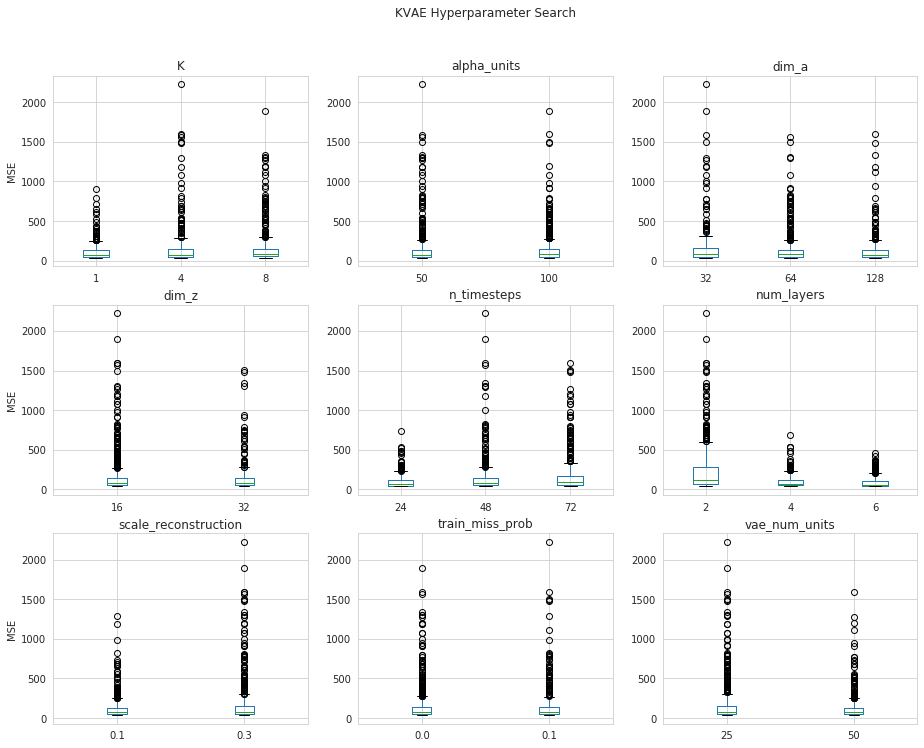

In [15]:
num_cols = 3
num_rows = int(np.ceil(len(search_params)/num_cols))

fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(15,12))

for idx, param_name in enumerate(search_params):
    col_idx = idx // num_cols
    row_idx = idx % num_cols
    ax = axes[col_idx, row_idx]

    total_results_df.boxplot(by=param_name, column='eval_mse_unobs_filt', ax=ax)
    
    if row_idx == 0:
        ax.set_ylabel('MSE')
    ax.set_xlabel('')
    ax.set_title(param_name)
fig.suptitle('KVAE Hyperparameter Search')

In [13]:
# n_timesteps = 24
# scale_reconstruction = 0.3
# train_miss_prob = 0.0
# K = 8
# dim_z = 32
# dim_a = 64
# vae_num_units = 25
# num_layers = 4
# alpha_units = 100

In [14]:
total_results_df.iloc[total_results_df['test_elbo_tot'].argmax()]

/home/jtc440/miniconda3/envs/ust_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


epoch                                                                    299
train_elbo_tot                                                       2.02812
train_elbo_kf                                                        19.6222
train_elbo_vae                                                      -5.90749
train_log_px                                                         16.6951
train_log_qa                                                         22.6026
test_elbo_tot                                                        9.97438
test_elbo_kf                                                         19.1738
test_elbo_vae                                                       -9.19937
test_log_px                                                          13.2702
test_log_qa                                                          22.4696
n_timesteps                                                               24
scale_reconstruction                                                     0.3

In [18]:
import os
import json
import csv
import pandas as pd
import absl
import numpy as np
import tensorflow as tf
import sys
sys.path.append('..')
from kvae import KalmanVariationalAutoencoder
from kvae.utils import reload_config, get_train_config
from kvae.utils.plotting import plot_segments
from data import construct_kvae_data

In [17]:
data = np.load(data_path)
X, mask = data['X'], data['mask']
train_subset_mask = np.load(train_mask_path)
test_subset_mask = np.load(test_mask_path)

mask_tf = 1 - mask
train_subset_mask_tf = 1 - train_subset_mask
test_subset_mask_tf = 1 - test_subset_mask

In [21]:
X[np.newaxis, ...].shape

(1, 8760, 512)

In [ ]:
plt.imshow

In [ ]:
exp_dir = ''
model_path = os.path.join(exp_dir, 'model.ckpt')

In [19]:
from IPython.display import Image

In [ ]:

config = get_train_config()
params = hashes_to_params[exp_dir.split('/')[-2]]

config = reload_config(config.FLAGS, config_dict=params)
config.log_dir = '.'
config.reload_model = model_path


train_data, train_mask = construct_kvae_data(X, mask, train_subset_mask,
                                             n_timesteps=config.n_timesteps,
                                             hop_length=config.hop_length)
test_data, test_mask = construct_kvae_data(X, mask, test_subset_mask, test=True)

with tf.Session() as sess:
    model = KalmanVariationalAutoencoder(train_data, test_data, train_mask, test_mask, config, sess)
    model.build_model().build_loss().initialize_variables()
    impute_out_res = model.impute_sonyc(X, test_subset_mask_tf, mask_tf, return_output=True)


eval_norm_mse_a_imputed = float(impute_out_res[0])
eval_mse_unobs_smooth = float(impute_out_res[1])
eval_mse_unobs_filt = float(impute_out_res[2])

x_filtered = impute_out_res[3]
x_imputed = impute_out_res[4]
a_filtered = impute_out_res[5]
a_imputed = impute_out_res[6]
z_filter = impute_out_res[7]
z_smooth = impute_out_res[8]
alpha = impute_out_res[9]

In [ ]:
mask_plot = (mask_tf * train_subset_mask_tf)[np.newaxis, ...]

In [ ]:
filename = 'impute_year_filter.png'
plot_segments(X[np.newaxis, ...], x_filtered, mask_plot, a_filtered, z_filter, alpha, filename, table_size=1, wh_ratio=10)
Image(filename)

In [ ]:
filename = 'impute_year_smooth.png'
plot_segments(X[np.newaxis, ...], x_imputed, mask_plot, a_imputed, z_smooth, alpha, filename, table_size=1, wh_ratio=10)
Image(filename)